<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-PyTorch/blob/master/Chapter18/detecting_the_number_plate_of_a_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/zeusees/HyperLPR/master/model/cascade.xml

--2020-10-05 17:11:19--  https://raw.githubusercontent.com/zeusees/HyperLPR/master/model/cascade.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 356611 (348K) [text/plain]
Saving to: ‘cascade.xml’

cascade.xml         100%[===================>] 348.25K  --.-KB/s    in 0.02s   

2020-10-05 17:11:19 (16.1 MB/s) - ‘cascade.xml’ saved [356611/356611]



In [2]:
!wget https://www.dropbox.com/s/4hbem2kxzqcwo0y/car1.jpg

--2020-10-05 17:11:19--  https://www.dropbox.com/s/4hbem2kxzqcwo0y/car1.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/4hbem2kxzqcwo0y/car1.jpg [following]
--2020-10-05 17:11:20--  https://www.dropbox.com/s/raw/4hbem2kxzqcwo0y/car1.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc85aa9564fd6c3f1f88a78860c5.dl.dropboxusercontent.com/cd/0/inline/BAucLfBUruvOnGDlym7B8dRyeUJN01uEbG_LnxBQ72AVGdWxoYU0h4Bd9_UdueGBStSdTo11wxQxVGQ4XI2gbBhHSakuVvJiVHfGLnnW2t-m_myAbp4pPbhwACxtEusPDu4/file# [following]
--2020-10-05 17:11:20--  https://uc85aa9564fd6c3f1f88a78860c5.dl.dropboxusercontent.com/cd/0/inline/BAucLfBUruvOnGDlym7B8dRyeUJN01uEbG_LnxBQ72AVGdWxoYU0h4Bd9_UdueGBStSdTo11wxQxVGQ4XI2gbBhHSakuVvJiVHfGLnnW2t-m_myAbp4pPbhwACx

In [3]:
!pip install torch_snippets
from torch_snippets import *
plate_cascade = cv2.CascadeClassifier('cascade.xml')
image = read("car1.jpg", 1)

     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 36.7MB 110kB/s 
     |████████████████████████████████| 102kB 8.6MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=34153ec7c2c1663ee9ebc472440fec3ce14338da61adbd30038633b3d82e0f99
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars


In [4]:
image_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

In [5]:
plates = plate_cascade.detectMultiScale(image_gray, 1.08, 2, minSize=(40, 40),maxSize=(1000, 100))

600 1273 359 91


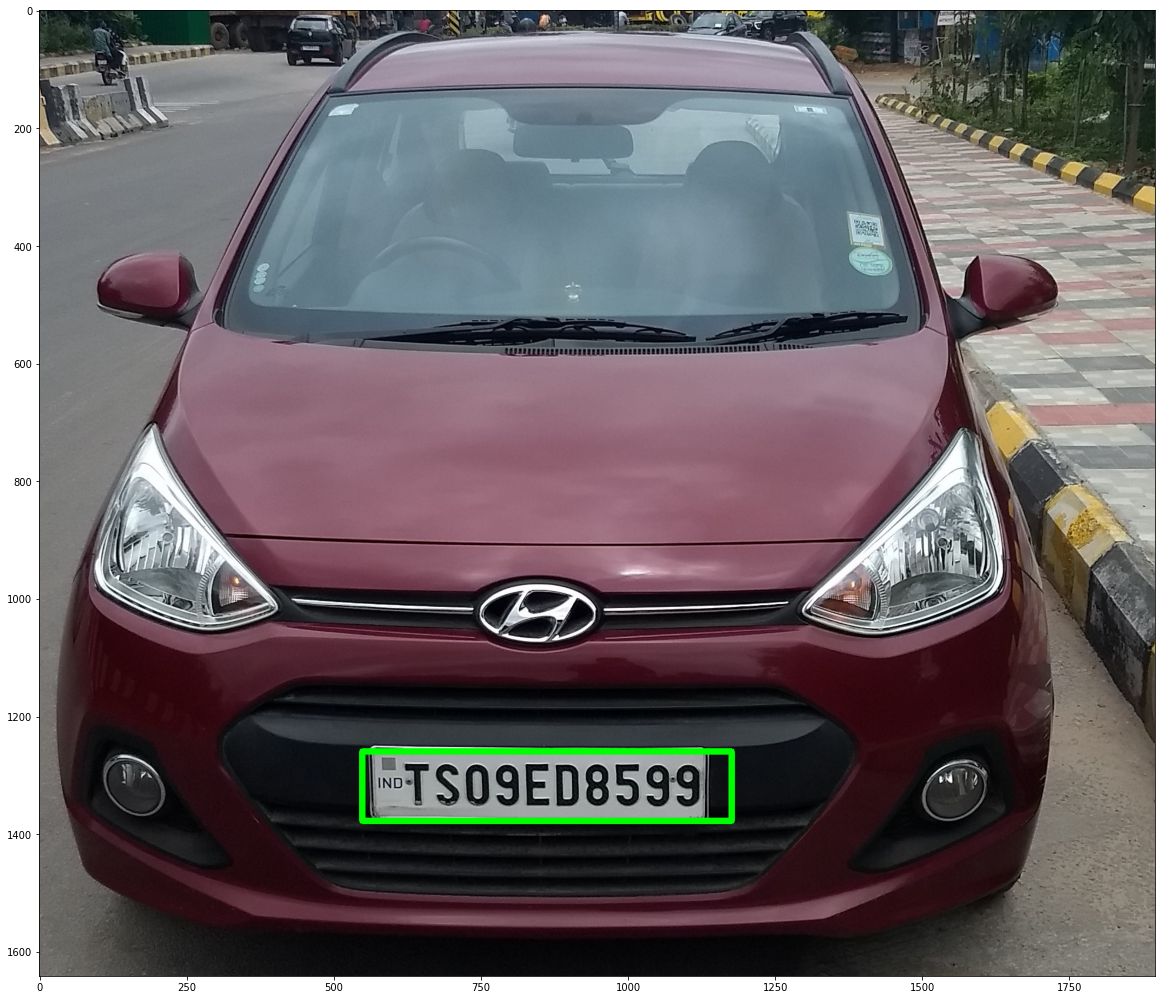

In [6]:
image2 = image.astype('uint8')
for (x, y, w, h) in plates:
    print(x,y,w,h)
    x -= w * 0.14
    w += w * 0.75
    y -= h * 0.15
    h += h * 0.3
    cv2.rectangle(image2, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 10)
show(image2, grid=True)